# Análisis de los datos obtenidos 

Uso de ipython para el análsis y muestra de los datos obtenidos durante la producción.Se implementa un regulador experto. Los datos analizados son del día 12 de Agosto del 2015

Los datos del experimento:
* Hora de inicio: 12:00
* Hora final : 12:30
* Filamento extruido: 425cm
* $T: 150ºC$
* $V_{min} tractora: 1.5 mm/s$
* $V_{max} tractora: 3.4 mm/s$
* Los incrementos de velocidades en las reglas del sistema experto son distintas:
    * En los casos 3 a 6 se pasa de un incremento de velocidad de +1 a un incremento de +2.

In [10]:
#Importamos las librerías utilizadas
import numpy as np
import pandas as pd
import seaborn as sns

In [11]:
#Mostramos las versiones usadas de cada librerías
print ("Numpy v{}".format(np.__version__))
print ("Pandas v{}".format(pd.__version__))
print ("Seaborn v{}".format(sns.__version__))

Numpy v1.9.2
Pandas v0.16.2
Seaborn v0.6.0


In [12]:
#Abrimos el fichero csv con los datos de la muestra
datos = pd.read_csv('ensayo3.CSV')

In [13]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [14]:
#Almacenamos en una lista las columnas del fichero con las que vamos a trabajar
columns = ['Diametro X','Diametro Y', 'RPM TRAC']

In [15]:
#Mostramos un resumen de los datos obtenidoss
datos[columns].describe()
#datos.describe().loc['mean',['Diametro X [mm]', 'Diametro Y [mm]']]

,Diametro X,Diametro Y,RPM TRAC
count,1124.000000,1124.000000,1124.000000
mean,1.668724,1.657342,2.257444
std,0.248754,0.237337,0.855732
min,0.988940,0.977249,1.497500
25%,1.482145,1.482943,1.497500
50%,1.659928,1.655338,1.497500
75%,1.826241,1.804748,3.500000
max,2.606193,2.609260,3.500000


Representamos ambos diámetro y la velocidad de la tractora en la misma gráfica

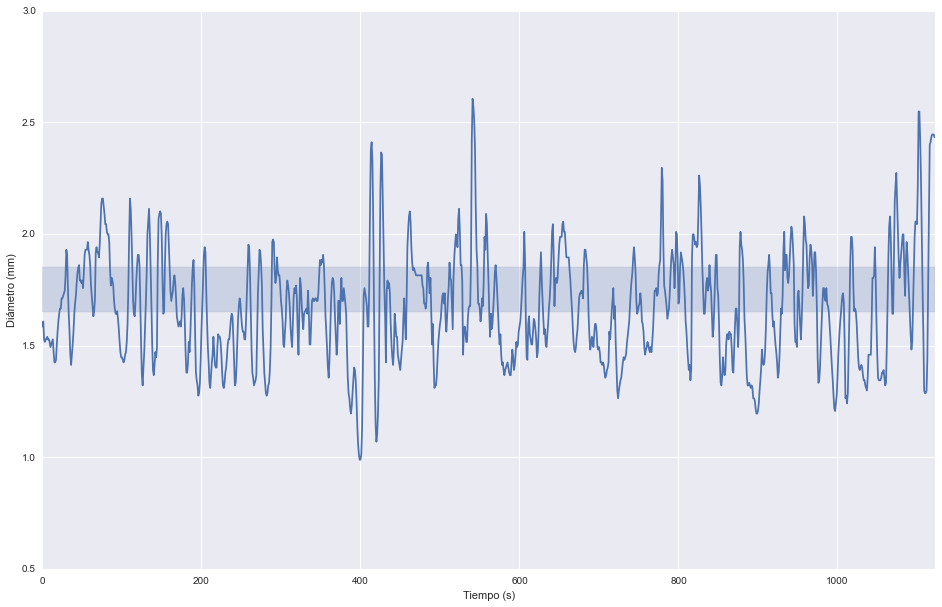

In [16]:
graf = datos.ix[:, "Diametro X"].plot(figsize=(16,10),ylim=(0.5,3))
graf.axhspan(1.65,1.85, alpha=0.2)
graf.set_xlabel('Tiempo (s)')
graf.set_ylabel('Diámetro (mm)')
#datos['RPM TRAC'].plot(secondary_y='RPM TRAC')

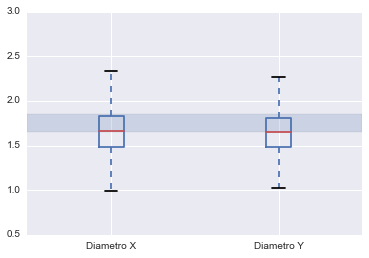

In [17]:
box = datos.ix[:, "Diametro X":"Diametro Y"].boxplot(return_type='axes')
box.axhspan(1.65,1.85, alpha=0.2)

Con esta tercera aproximación se ha conseguido estabilizar los datos y reducir la desviación estandar, sin embargo, la medía del filamento y de la velocidad de tracción ha disminuido también.

Como tercera  aproximación, vamos a  modificar los incrementos en los que el diámetro se encuentra entre $1.80mm$ y $1.70 mm$, en sentido de subida. (casos 3 y 5) el sentido de bajada se mantendrá con incrementos de +1.


Se ha detectado también que el eje de giro de la tractora está algo suelto. Se va a apretar para el siguiente ensayo.

##Comparativa de Diametro X frente a Diametro Y para ver el ratio del filamento

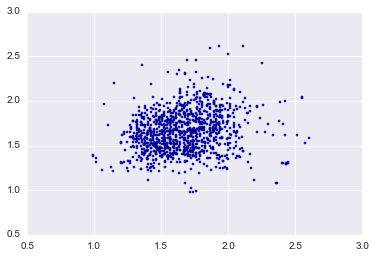

In [18]:
plt.scatter(x=datos['Diametro X'], y=datos['Diametro Y'], marker='.')

#Filtrado de datos
Las muestras tomadas $d_x >= 0.9$ or $d_y >= 0.9$ las asumimos como error del sensor, por ello las filtramos de las muestras tomadas.

In [19]:
datos_filtrados = datos[(datos['Diametro X'] >= 0.9) & (datos['Diametro Y'] >= 0.9)]

In [20]:
#datos_filtrados.ix[:, "Diametro X":"Diametro Y"].boxplot(return_type='axes')

##Representación de X/Y

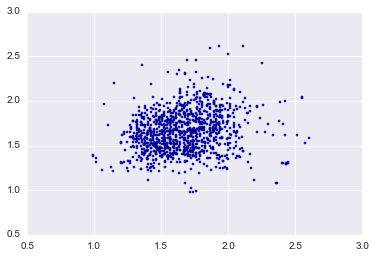

In [21]:
plt.scatter(x=datos_filtrados['Diametro X'], y=datos_filtrados['Diametro Y'], marker='.')

#Analizamos datos del ratio

In [22]:
ratio = datos_filtrados['Diametro X']/datos_filtrados['Diametro Y']
ratio.describe()

count    1124.000000
mean        1.024330
std         0.204496
min         0.523577
25%         0.884079
50%         0.999381
75%         1.125506
max         2.188724
dtype: float64

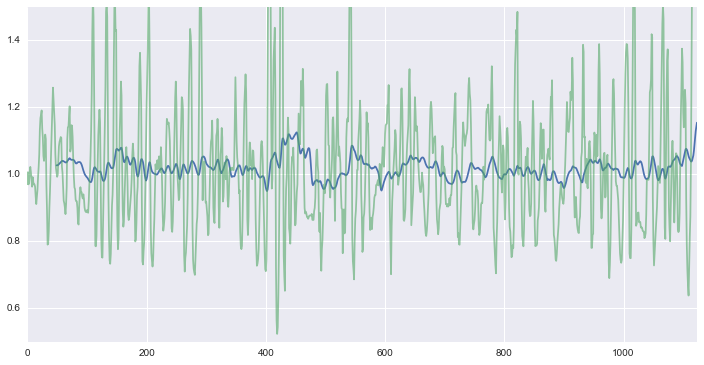

In [23]:
rolling_mean = pd.rolling_mean(ratio, 50)
rolling_std = pd.rolling_std(ratio, 50)
rolling_mean.plot(figsize=(12,6))
# plt.fill_between(ratio, y1=rolling_mean+rolling_std, y2=rolling_mean-rolling_std, alpha=0.5)
ratio.plot(figsize=(12,6), alpha=0.6, ylim=(0.5,1.5))

#Límites de calidad

Calculamos el número de veces que traspasamos unos límites de calidad. 
$Th^+ = 1.85$ and $Th^- = 1.65$ 

In [24]:
Th_u = 1.85
Th_d = 1.65

In [25]:
data_violations = datos[(datos['Diametro X'] > Th_u) | (datos['Diametro X'] < Th_d) |
                       (datos['Diametro Y'] > Th_u) | (datos['Diametro Y'] < Th_d)]

In [26]:
data_violations.describe()

,Tmp Husillo,Tmp Nozzle,Diametro X,Diametro Y,MARCHA,PARO,RPM EXTR,RPM TRAC
count,1028.000000,1028.000000,1028.000000,1028.000000,1028,1028,1028,1028.000000
mean,66.589397,151.097860,1.661490,1.650587,1,1,0,2.230581
std,0.144198,0.740691,0.258431,0.246481,0,0,0,0.849306
min,66.300000,149.600000,0.988940,0.977249,True,True,0,1.497500
25%,66.500000,150.500000,1.470675,1.471450,1,1,0,1.497500
50%,66.600000,151.000000,1.631253,1.620859,1,1,0,1.497500
75%,66.700000,151.600000,1.837711,1.816241,1,1,0,3.500000
max,67.000000,153.100000,2.606193,2.609260,True,True,0,3.500000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x08FB35D0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0908F330>], dtype=object)

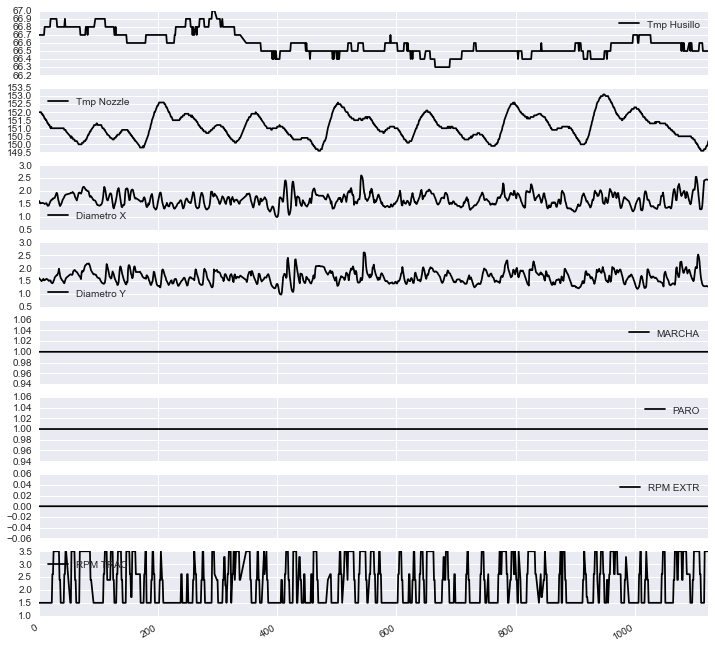

In [27]:
data_violations.plot(subplots=True, figsize=(12,12))